In [33]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as pltimg

from sklearn import datasets, metrics, tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
import time
import statsmodels.api as smf
import warnings
warnings.filterwarnings('ignore')


In [34]:
w1 = pd.read_csv(r'D:\ALY6020\final\houseprices-2.csv') #read the file
w1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [35]:
w1.info()  # check the types of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [36]:
w1.duplicated(keep = False)      # check duplicated rows
w1[w1.duplicated(keep = False)]  

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [37]:
np.any(pd.isnull(w1))   #estimate exist of NaN
col_null= w1.isnull().sum(axis=0) # count all NaN data
col_null

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64

In [38]:
col_null = pd.DataFrame(col_null)                  # All rows containing NAN
include_null_rows=col_null[col_null[0]>0]
include_null_rows

,0
MSZoning,4
LotFrontage,486
Alley,2721
Utilities,2
Exterior1st,1
Exterior2nd,1
MasVnrType,24
MasVnrArea,23
BsmtQual,81
BsmtCond,82



According to the data description ,  some 'NaN' are part of the data 
-------------------------------------------------------------------------------------------------
After selecting, the following have real missing values:



'MSZoning'    
'LotFrontage'   
'Utilities'   
'Exterior1st'   
'Exterior2nd'  

'MasVnrType'  
'MasVnrArea'  
'BsmtFinSF1'  
'BsmtFinSF2'  
'BsmtUnfSF'   

'TotalBsmtSF'  
'Electrical'  
'BsmtFullBath'  
'BsmtHalfBath'  
'KitchenQual'  


'Functional'  
'GarageYrBlt'  
'GarageCars'  
'GarageArea'  
'SaleType'  





In [39]:
w1.dropna(axis=0, how='any',subset=[
'MSZoning',
'LotFrontage',
'Utilities',
'Exterior1st',
'Exterior2nd',
'MasVnrType',
'MasVnrArea',
'BsmtFinSF1',
'BsmtFinSF2',
'BsmtUnfSF',
'TotalBsmtSF',
'Electrical',
'BsmtFullBath',
'BsmtHalfBath',
'KitchenQual',
'Functional',
'GarageYrBlt',
'GarageCars',
'GarageArea',
'SaleType'],inplace=True )    # deleate missing value

w1.reset_index(drop=True, inplace=True) 
w1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2254,2912,20,RL,80.0,13384,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,NaN
2255,2913,160,RM,21.0,1533,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Abnorml,NaN
2256,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2257,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN


In [40]:
w1 = w1.fillna('NA',axis = 0,)     # replace 'NaN' to 'NA'  this is a part of data
w1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2254,2912,20,RL,80.0,13384,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2006,WD,Normal,NA
2255,2913,160,RM,21.0,1533,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,12,2006,WD,Abnorml,NA
2256,2916,160,RM,21.0,1894,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,4,2006,WD,Abnorml,NA
2257,2917,20,RL,160.0,20000,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,9,2006,WD,Abnorml,NA


In [41]:
cols = ['MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition']     

# replace str to number
def convert_item(item):
    return np.argwhere(uni == item)[0,0]
for col in cols:
    uni = w1[col].unique()
    w1[col] = w1[col].map(convert_item)

w1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,0,65.0,8450,0,0,0,0,0,...,0,0,0,0,0,2,2008,0,0,208500.0
1,2,20,0,80.0,9600,0,0,0,0,0,...,0,0,0,0,0,5,2007,0,0,181500.0
2,3,60,0,68.0,11250,0,0,1,0,0,...,0,0,0,0,0,9,2008,0,0,223500.0
3,4,70,0,60.0,9550,0,0,1,0,0,...,0,0,0,0,0,2,2006,0,1,140000.0
4,5,60,0,84.0,14260,0,0,1,0,0,...,0,0,0,0,0,12,2008,0,0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2254,2912,20,0,80.0,13384,0,0,0,0,0,...,0,0,0,0,0,5,2006,0,0,NA
2255,2913,160,1,21.0,1533,0,0,0,0,0,...,0,0,0,0,0,12,2006,0,1,NA
2256,2916,160,1,21.0,1894,0,0,0,0,0,...,0,0,0,0,0,4,2006,0,1,NA
2257,2917,20,0,160.0,20000,0,0,0,0,0,...,0,0,0,0,0,9,2006,0,1,NA


In [42]:
DF_without_SalePrice = w1.iloc[1120:,list(range(80))]        # without SalePrice    for predicting

w2 = w1[:1120]                          # include SalePrice    for building model
DF_without_SalePrice

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1120,1461,20,4,80.0,11622,0,0,0,0,0,...,120,0,0,1,0,0,6,2010,0,0
1121,1462,20,0,81.0,14267,0,0,1,0,0,...,0,0,0,0,4,12500,6,2010,0,0
1122,1463,60,0,74.0,13830,0,0,1,0,0,...,0,0,0,1,0,0,3,2010,0,0
1123,1464,60,0,78.0,9978,0,0,1,0,0,...,0,0,0,0,0,0,6,2010,0,0
1124,1465,120,0,43.0,5005,0,0,1,3,0,...,144,0,0,0,0,0,1,2010,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2254,2912,20,0,80.0,13384,0,0,0,0,0,...,0,0,0,0,0,0,5,2006,0,0
2255,2913,160,1,21.0,1533,0,0,0,0,0,...,0,0,0,0,0,0,12,2006,0,1
2256,2916,160,1,21.0,1894,0,0,0,0,0,...,0,0,0,0,0,0,4,2006,0,1
2257,2917,20,0,160.0,20000,0,0,0,0,0,...,0,0,0,0,0,0,9,2006,0,1



Linear Regression
------

In [43]:

from sklearn.linear_model import LinearRegression
y = w2[['SalePrice']]              #split data      
X = w2.iloc[:, list(range(80))] # 80 columns

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
Lin_Reg = LinearRegression()

start_time_LR = time.perf_counter()

Lin_Reg.fit(X_train,y_train)

end_time_LR = time.perf_counter()
fit_time_LR = end_time_LR - start_time_LR

print('LR_SCORE:',Lin_Reg.score(X_test,y_test))
print('FIT TIME_LR:',fit_time_LR)

LR_SCORE: 0.881688326034489
FIT TIME_LR: 0.004261200000655663


In [44]:
import statsmodels.api as sm
X2 = sm.add_constant(X_train) 
est = sm.OLS(y_train.astype(float), X2.astype(float))
est2 = est.fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     64.28
Date:                Sat, 17 Dec 2022   Prob (F-statistic):          2.21e-295
Time:                        08:40:34   Log-Likelihood:                -10558.
No. Observations:                 896   AIC:                         2.127e+04
Df Residuals:                     818   BIC:                         2.165e+04
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.455e+06   1.79e+06     -1.935      0.053   -6.96e+06    4.94e+04
Id                1.1712      2.741      0.427      0.669      -4.209       6.551
MSSubClass      -49.7013     63.838     -0.779      0.436    -175.007      75.604
MSZoning        748.8984   1772.334      0.423      0.673   -2729.960    4227.757
LotFrontage    -113.9339     68.096     -1.673      0.095    -247.598      19.730
LotArea           0.5830      0.166      3.507      0.000       0.257       0.909
Street        -8.146e+04   2.69e+04     -3.033      0.002   -1.34e+05   -2.87e+04
Alley         -3460.0708   3597.921     -0.962      0.336   -1.05e+04    3602.173
LotShape       1837.8766   2507.159      0.733      0.464   -3083.347    6759.100
LandContour    4241.0458   2246.972      1.887      0.059    -169.465    8651.557
Utilities     -2.716e-08   3.21e-09     -8.462      0.000   -3.35e-08   -2.09e-08
LotConfig       235.0251   1294.348      0.182      0.856   -2305.610    2775.660
LandSlope      1411.8184   6130.490      0.230      0.818   -1.06e+04    1.34e+04
Neighborhood   -993.6547    217.836     -4.561      0.000   -1421.238    -566.071
Condition1    -1892.3191   1081.134     -1.750      0.080   -4014.442     229.804
Condition2     -2.56e+04   4375.587     -5.852      0.000   -3.42e+04    -1.7e+04
BldgType      -4395.9386   2498.825     -1.759      0.079   -9300.803     508.926
HouseStyle     -118.4740   1076.935     -0.110      0.912   -2232.356    1995.408
OverallQual    1.437e+04   1631.423      8.809      0.000    1.12e+04    1.76e+04
OverallCond    7724.4390   1609.404      4.800      0.000    4565.390    1.09e+04
YearBuilt       329.8553    106.455      3.099      0.002     120.899     538.812
YearRemodAdd    124.0332     96.655      1.283      0.200     -65.688     313.755
RoofStyle      3701.2061   2467.559      1.500      0.134   -1142.288    8544.700
RoofMatl      -8805.6392   3417.927     -2.576      0.010   -1.55e+04   -2096.699
Exterior1st    -388.5831    755.130     -0.515      0.607   -1870.804    1093.638
Exterior2nd     589.4007    732.492      0.805      0.421    -848.384    2027.185
MasVnrType     2609.6066   1946.510      1.341      0.180   -1211.136    6430.349
MasVnrArea       36.5977      8.161      4.484      0.000      20.578      52.617
ExterQual      5369.4875   2710.649      1.981      0.048      48.840    1.07e+04
ExterCond     -1776.9433   2161.235     -0.822      0.411   -6019.164    2465.277
Foundation    -2569.9798   2162.049     -1.189      0.235   -6813.797    1673.838
BsmtQual       6216.9751   1561.193      3.982      0.000    3152.558    9281.392
BsmtCond      -2570.3380   2150.845     -1.195      0.232   -6792.164    1651.488
BsmtExposure   2880.5724   1072.823      2.685      0.007     774.761    4986.383
BsmtFinType1   -234.7312    770.875     -0.304   

In [45]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
y_pred_LR = Lin_Reg.predict(X_test)
print("MSE:",mean_squared_error(y_test,y_pred_LR))

print("RMSE:",mean_absolute_error(y_test,y_pred_LR))

print("MAE:",r2_score(y_test,y_pred_LR))

MSE: 721894739.6520064
RMSE: 19931.049403855202
MAE: 0.881688326034489


In [46]:
Pred_without_SalePrice_Lin_Reg = Lin_Reg.predict(DF_without_SalePrice)  # Linear Regression Predict value

Pred_without_SalePrice_Lin_Reg

array([[110317.76525629],
       [193323.61209387],
       [182425.67825059],
       ...,
       [ 75639.87089066],
       [178012.21289895],
       [266840.5480432 ]])

First,we split the data into independent variables X and outcome variables y, then we split the labeled data into train set and test set. After splitting the data, we build the linear regression model and obtain the model with 88.17% accuracy rate. Judging from the p values, we have a number of significant features, such as "Neighborhood", 
"Overall conditions" and "Year of built"with p-values smaller than .05. These features have larger impact on the outcome variable - housing prices. By seperating and learning from these patterns, houses prices could be accurately predicted. 
To apply the model, the predictions on the rest of data were printed for house price value. The model's MSE is 721894739.6520064, RMSE 19931.049403855202 and MAE is 0.881688326034489. 
 

KNN
------

In [47]:
from sklearn.neighbors import KNeighborsRegressor        

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

X_normalizer = StandardScaler()                   # make the data  Normalization
X_train_1 = X_normalizer.fit_transform(X_train)
X_test_1 = X_normalizer.transform(X_test)

y_normalizer = StandardScaler()
y_train_1 = y_normalizer.fit_transform(y_train)
y_test_1 = y_normalizer.transform(y_test)

knn = KNeighborsRegressor(n_neighbors=5)        # build model

start_time_KNN = time.perf_counter()

knn.fit(X_train_1, y_train_1.ravel())

end_time_KNN = time.perf_counter()
fit_time_KNN = end_time_KNN - start_time_KNN

print('KNN_SCORE:',knn.score(X_test_1,y_test_1))
print('FIT TIME_KNN:',fit_time_LR)

KNN_SCORE: 0.8342294854974466
FIT TIME_KNN: 0.004261200000655663


In [48]:
from sklearn.model_selection import GridSearchCV         # find the best K 
param_grid = [{'n_neighbors': list(range(1,50))}]

grid_search = GridSearchCV(knn,param_grid,cv=5,scoring='neg_mean_squared_error')

grid_search.fit(X_train_1,y_train_1)
print('the best k',grid_search.best_params_)

the best k {'n_neighbors': 5}


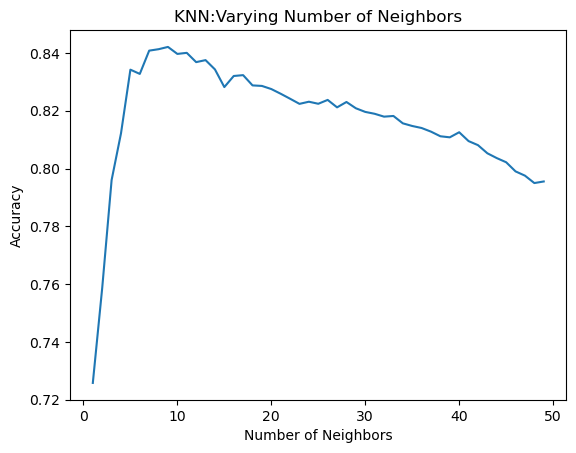

In [49]:
k_range = range(1,50)

# Calculate the accuracy for different values of k
scores = []
for k in k_range:
    knn.set_params(n_neighbors=k)
    knn.fit(X_train_1, y_train_1)
    scores.append(knn.score(X_test_1, y_test_1))
    
# Visualization
plt.plot(k_range, scores)
plt.title('KNN:Varying Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


In [50]:
df=X_normalizer.fit_transform(DF_without_SalePrice)

y_pred_knn = knn.predict(df)

y_pred_inv = y_normalizer.inverse_transform(y_pred_knn)


Pred_without_SalePrice_KNN = y_pred_inv              #  knn.predict(DF_without_SalePrice)
Pred_without_SalePrice_KNN


array([[128378.73469388],
       [141638.93877551],
       [194198.7755102 ],
       ...,
       [121171.42857143],
       [170680.36734694],
       [226575.59183673]])

By cross checking the accuracy and k's values, the best k is 5, which the graph was plotted to visualize it. The score of this model is .8342 and the time used to operate is 0.9470440999999994. 
KNN uses a different logic and algorithm to caculate the relationship between house features and their prices: by recognizing the distance between feature points and prediction data, different number of neighbors (k values) were tested and compared with each other. Then, when we input the new set of feature, the model would output the prediction based on the optimal k-value. Therefore, when we have certain independent variables of a house, the model would give us the prediction of house prices based on the data we trained. 

Decision Tree
--

In [51]:
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor(random_state=1,max_depth = 4)

start_time_DT = time.perf_counter()

DT.fit(X_train, y_train)

end_time_DT = time.perf_counter()


fit_time_DT = end_time_DT - start_time_DT
print('FIT TIME_DT:',fit_time_DT)
print('Accuracy',DT.score(X_test,y_test))


FIT TIME_DT: 0.011014699999577715
Accuracy 0.7632069867366316


In [52]:
y_pred_DT = DT.predict(X_test)
mse_dt =mean_squared_error(y_test,y_pred_DT)
rmse_dt = mse_dt**(1/2)
print('MSE_DT:',mse_dt)
print('RMSE_DT:',rmse_dt)


MSE_DT: 1444824715.3615963
RMSE_DT: 38010.84996894435


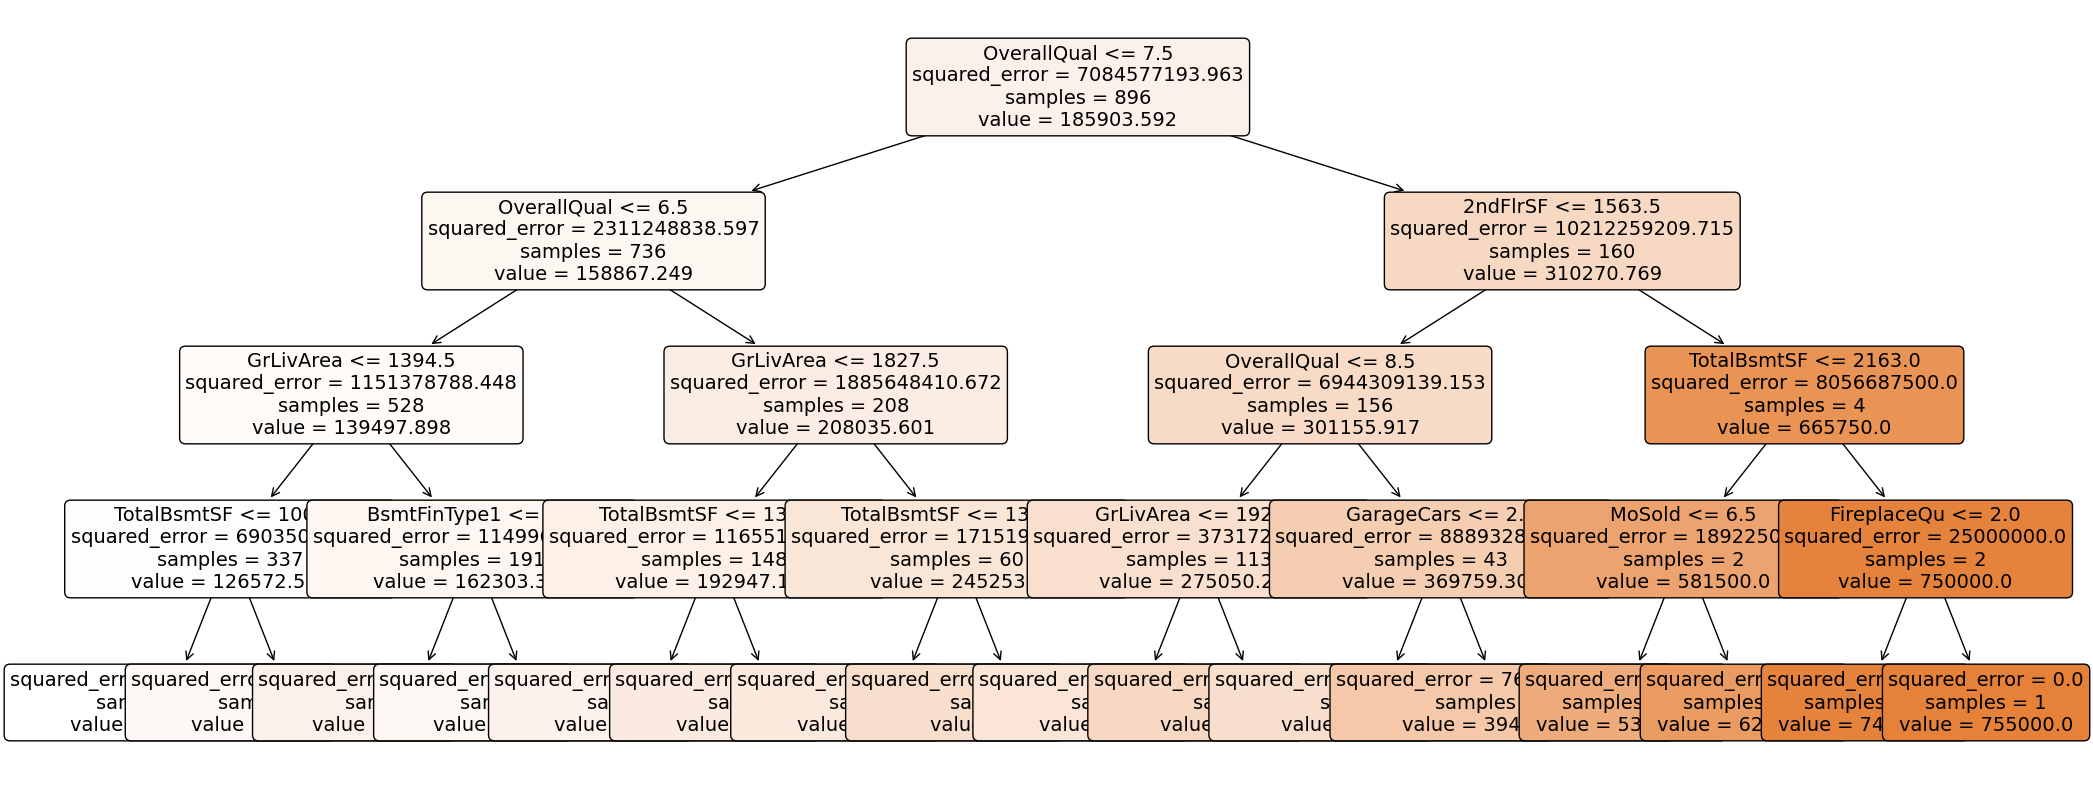

In [53]:
plt.figure(figsize=(25,10))
plot=tree.plot_tree(DT, feature_names=X.columns.values.tolist(), 
                         filled=True,rounded=True,
                   fontsize=14)

In [54]:
Pred_without_SalePrice_DT = DT.predict(DF_without_SalePrice)    #  Decision Tree predict(DF_without_SalePrice)
print(Pred_without_SalePrice_DT)

[116971.98654709 145352.64912281 186595.45454545 ... 116971.98654709
 145352.64912281 229392.42857143]


Above we have a visualization of a decision tree model. This model has an accuracy rate of .7632 and it takes .058 to operate.The MSE_DT is 1444824715.3615963; while the RMSE_DT is 38010.84997. 


Random Forest
------

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE

In [56]:
RF = RandomForestRegressor(random_state = 1)##n_estimators = 400, min_samples_leaf = 0.12)

start_time_RF = time.perf_counter() 

RF.fit(X_train,y_train)

end_time_RF = time.perf_counter()

fit_time_RF = end_time_RF - start_time_RF

RFscore=RF.score(X_test,y_test)
print('FIT TIME_RF:',fit_time_RF)
print('SCORE:',RFscore)

FIT TIME_RF: 0.9563671000005343
SCORE: 0.9025326950894358


In [57]:
y_pred_RF = RF.predict(X_test)
rmse_RF = MSE(y_test,y_pred_RF)**(1/2)
print('RMSE_RF:',rmse_RF)

RMSE_RF: 24386.676530744906


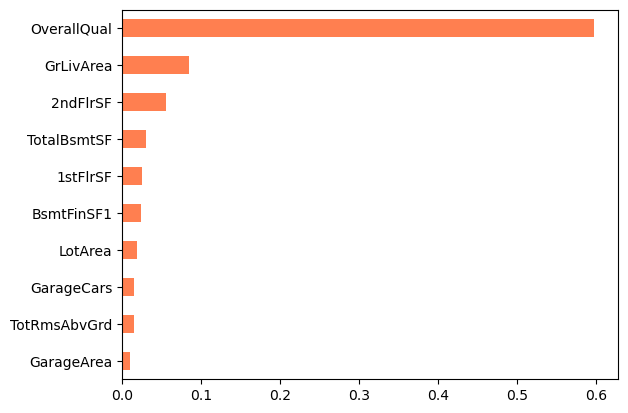

In [58]:
importances_rf = pd.Series(RF.feature_importances_,index = X.columns)       # check the importance of festures
sorted_importances_rf = importances_rf.sort_values()
sorted_importances_rf1=sorted_importances_rf[-10:]
sorted_importances_rf1.plot(kind = 'barh',color = 'coral')
plt.show()

In [59]:
Pred_without_SalePrice_RF = RF.predict(DF_without_SalePrice)    #  Random Forest predict(DF_without_SalePrice)
print(Pred_without_SalePrice_RF)

[127942.08 157679.75 184527.52 ...  88559.64 152839.9  244176.48]


The 4th model is a random forest model. The overall score for this model is .90 and operation time is .9361. The RMSE_RF is 24386.6765. Apart from the basic modeling process, use feature importance function to find out the biggest contribution to the outcome variable. 
From the graph above, we could see that overall quality is a key influence factor on the house prices, followed by above ground living area. It makes sense since overall quality evaluated almost every aspect of a house, which decide the value of our outcome variable -- house prices. 
The prediction for the rest of data has been printed as well. 

Neural network
----

In [60]:
from sklearn.neural_network import MLPRegressor

mlp=MLPRegressor(hidden_layer_sizes=500,activation='relu',solver='adam',max_iter=150000,random_state = 1)

start_time_NN = time.perf_counter() 

mlp.fit(X_train_1, y_train_1)

end_time_NN = time.perf_counter()
fit_time_NN = end_time_NN - start_time_NN



print('FIT TIME_NN:',fit_time_NN)
print('SCORE',mlp.score(X_test_1,y_test_1))


y_pred_NN = mlp.predict(X_test_1).reshape(-1,1)
y_pred_inv_NN = y_normalizer.inverse_transform(y_pred_NN)


print('MSE_NN',MSE(y_test,y_pred_inv_NN))


FIT TIME_NN: 1.047812800000429
SCORE 0.8605154802350854
MSE_NN 851083732.5362427


In [61]:

param_grid_NN = [{'hidden_layer_sizes': [100,200,300,400,500,600,700]}]

grid_search_NN = GridSearchCV(mlp,param_grid_NN,cv=5,scoring='r2')

grid_search_NN.fit(X_train_1,y_train_1)
print('the best hidden_layer_sizes',grid_search_NN.best_params_)

the best hidden_layer_sizes {'hidden_layer_sizes': 500}


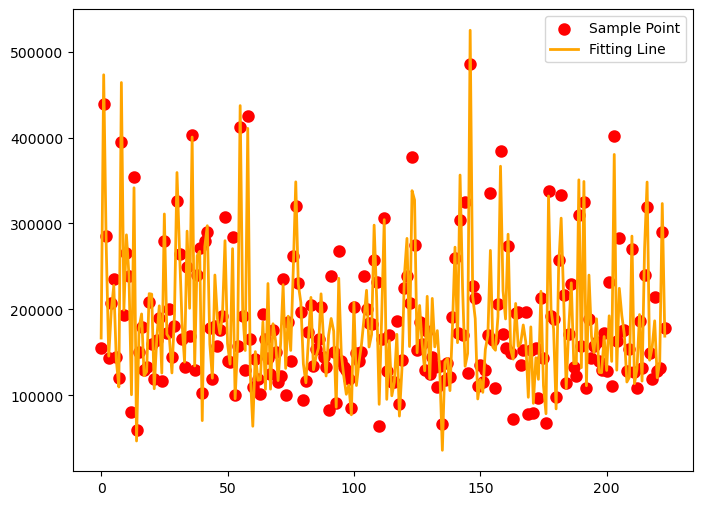

range(0, 224)


In [62]:
y_pred_test_NN = mlp.predict(X_test_1).reshape(-1,1)

predict_Y001= y_normalizer.inverse_transform(y_pred_test_NN)

xx=range(0,len(y_test_1))
plt.figure(figsize=(8,6))
plt.scatter(xx,y_test,color="red",label="Sample Point",linewidth=3) 
plt.plot(xx,predict_Y001,color="orange",label="Fitting Line",linewidth=2)
plt.legend()
plt.show()
print(xx)

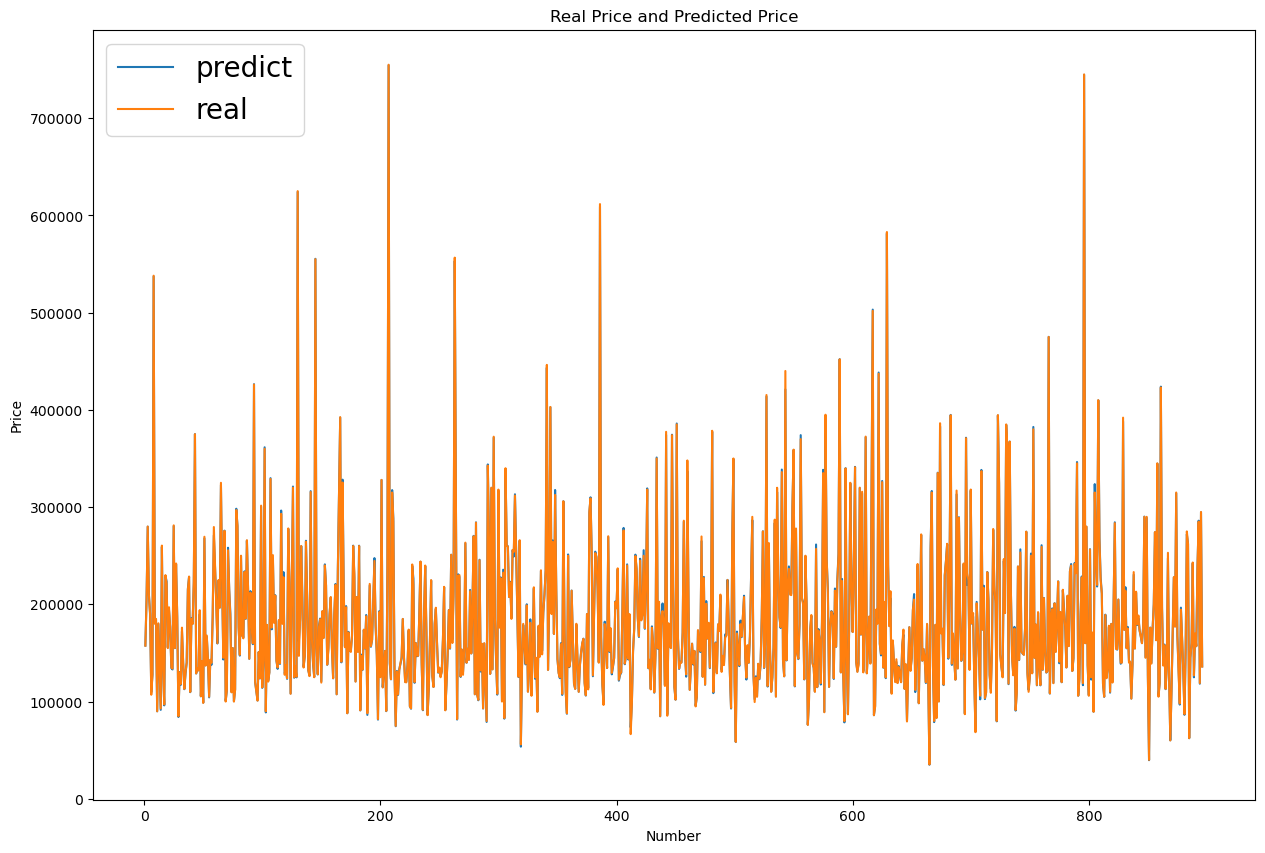

In [63]:
plt.figure(figsize=(15,10))
plt.title("Real Price and Predicted Price")
plt.xlabel("Number")
plt.ylabel("Price")
    
predict_Y=mlp.predict(X_train_1).reshape(-1,1)
predict_Y1= y_normalizer.inverse_transform(predict_Y)
plt.plot([x for x in range(1,len(X_train)+1)], predict_Y1, label='predict')
plt.plot([x for x in range(1,len(X_train)+1)], y_train, label='real')
plt.legend(['predict', 'real'], loc=2, fontsize=20)
plt.show()

In [64]:
y_pred_NN_price = mlp.predict(X_normalizer.fit_transform(DF_without_SalePrice)).reshape(-1,1)  # Neural network predict(DF_without_SalePrice)

y_pred_inv_NN = y_normalizer.inverse_transform(y_pred_NN_price)


Pred_without_SalePrice_NN = y_pred_inv_NN          

print(Pred_without_SalePrice_NN)

[[144074.15944403]
 [152176.24850848]
 [199551.08031181]
 ...
 [105076.41174385]
 [207396.11618571]
 [261496.29944844]]


The last model is a neural network model, which added some hidden layers between inputs and output, so that the model is more sophisticated and accurate. The model has an accuracy rate of 0.8605154802350854 and MSE_NN is 851083732.5362427. The model takes 1.0903153000000003 to operate. 

By doing grid search, computing the best hidden layer sizes, which is 500. 
Above is a visualization of real house prices and the predicted house prices. 
The benefits of applicating neural network is that it allows larger scale of data processing and understanding. However, the trade-off here is the time and effort on pre-process of the dataset. 